In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
%ls

 Volume in drive C is SSD_80GB
 Volume Serial Number is 9279-00B2

 Directory of C:\Users\Alex\Desktop\nyc-health-inspections

06/18/2016  05:04 PM    <DIR>          .
06/18/2016  05:04 PM    <DIR>          ..
06/17/2016  07:59 PM                82 .gitignore
06/18/2016  05:02 PM    <DIR>          .ipynb_checkpoints
06/17/2016  09:25 PM           419,403 big-box-plot.png
06/17/2016  07:59 PM           587,844 big-violin-plot.png
06/17/2016  08:08 PM       163,828,437 DOHMH_New_York_City_Restaurant_Inspection_Results.csv
05/22/2016  11:53 AM        14,261,259 nyc_building_sales.csv
06/18/2016  01:05 PM         1,023,430 seaborn_api_box_violin.ipynb
06/18/2016  05:04 PM               920 seaborn_api_categorical.ipynb
06/18/2016  05:00 PM           637,475 seaborn_api_model_fitting.ipynb
06/18/2016  02:08 PM         1,306,415 seaborn_api_multivariate.ipynb
               9 File(s)    182,065,265 bytes
               3 Dir(s)   8,012,578,816 bytes free


In [3]:
sales = pd.read_csv("nyc_building_sales.csv")

C:\Users\Alex\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2902: DtypeWarning: Columns (23,26,28,29,70,71,86) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
owner_dummy = sales[sales['SalePrice'] < 1*10**9].copy()
owner_dummy['P/NP'] = (owner_dummy['OwnerType'] == 'P').replace(True, "P").replace(False, "NP")

In [6]:
pd.set_option("display.max_columns", 100)

In [7]:
owner_dummy.head(1)

,Unnamed: 0,Index,Borough,Block,Lot,SalePrice,LandSquareFeet,MarketValueSqFt,CD,CT2010,CB2010,SchoolDist,Council,ZipCode,FireComp,PolicePrct,HealthArea,SanitBoro,SanitDistrict,SanitSub,Address,ZoneDist1,ZoneDist2,ZoneDist3,ZoneDist4,Overlay1,Overlay2,SPDist1,SPDist2,LtdHeight,AllZoning1,AllZoning2,SplitZone,BldgClass,LandUse,Easements,OwnerType,OwnerName,LotArea,BldgArea,ComArea,ResArea,OfficeArea,RetailArea,GarageArea,StrgeArea,FactryArea,OtherArea,AreaSource,NumBldgs,NumFloors,UnitsRes,UnitsTotal,LotFront,LotDepth,BldgFront,BldgDepth,Ext,ProxCode,IrrLotCode,LotType,BsmtCode,AssessLand,AssessTot,ExemptLand,ExemptTot,YearBuilt,BuiltCode,YearAlter1,YearAlter2,HistDist,Landmark,BuiltFAR,ResidFAR,CommFAR,FacilFAR,BoroCode,BBL,CondoNo,Tract2010,XCoord,YCoord,ZoneMap,ZMCode,Sanborn,TaxMap,EDesigNum,APPBBL,APPDate,PLUTOMapID,Version,CurFvT,NewFvT,CuravtA,AssessmentValueSqFt,EstPriorMarketValueSqFt,EstCurentMarketValueSqFt,ValueRatio,P/NP
0,0,0,Bronx,2268,18,1800000,2500,221.538462,201,41,1002,7,8,10454,E083,40,4500,2,1,2A,532 EAST 142 STREET,R6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R6,NaN,N,C1,2,0,P,"HAXHARI, GAC",2500,8125,0,8125,0,0,0,0,0,0,2,1,4,7,7,25,100,0,0,NaN,2,N,5,2,2197,216878,0,0,2015,NaN,0,0,NaN,NaN,3.25,2.43,0,4.8,2,2022680018,0,41,1007305,234328,6a,NaN,209S029,20901,NaN,0,NaN,1,16v1,143700,620769,2035,0.250462,17.686154,76.402338,2.899629,P


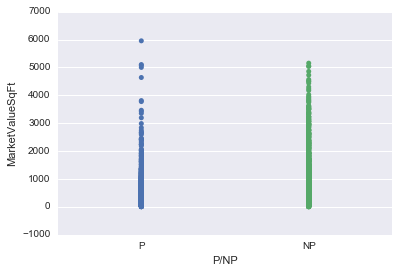

In [11]:
sns.stripplot(x="P/NP", y="MarketValueSqFt", data=owner_dummy)

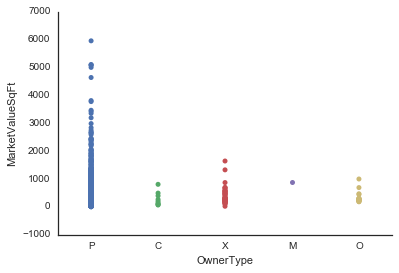

In [25]:
with sns.axes_style("white"):
    sns.stripplot(x="OwnerType", y="MarketValueSqFt", data=sales)
    sns.despine()

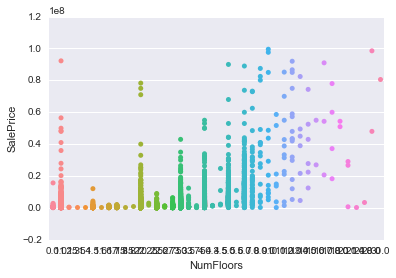

In [22]:
sns.stripplot(x="NumFloors", y="SalePrice", data=sales[sales['SalePrice'] < 1*10**8])

`jitter=True` is useful.

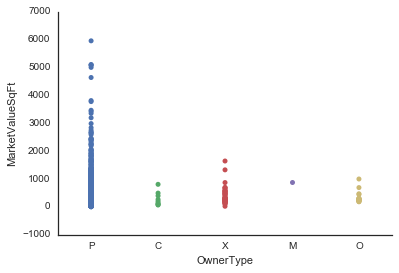

In [30]:
with sns.axes_style("white"):
    sns.stripplot(x="OwnerType", y="MarketValueSqFt", data=sales, jitter=True)
    sns.despine()

`sns.swarmplot` is a different but even more viable approach.

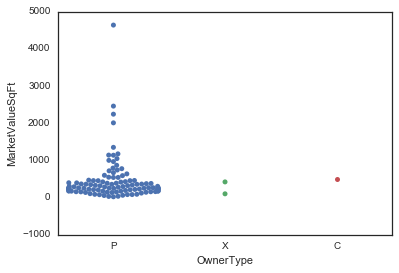

In [34]:
with sns.axes_style("white"):
    sns.swarmplot(x="OwnerType", y="MarketValueSqFt", data=sales.sample(1000))

Note that in this case since there's so many more `P` than any other category it's not *that* effective.

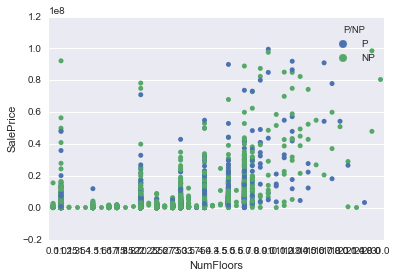

In [36]:
sns.stripplot(x="NumFloors", y="SalePrice", data=owner_dummy[owner_dummy['SalePrice'] < 1*10**8], hue="P/NP")

Hueing!

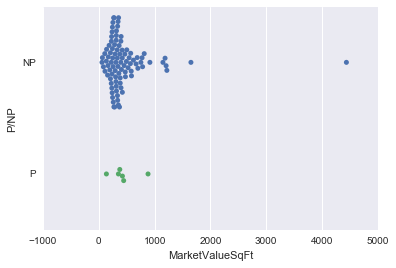

In [39]:
sns.swarmplot(y="P/NP", x="MarketValueSqFt", data=owner_dummy.sample(100))

Swapped orientation! (can also be forced with `orient=`).

Bar plots are nice.

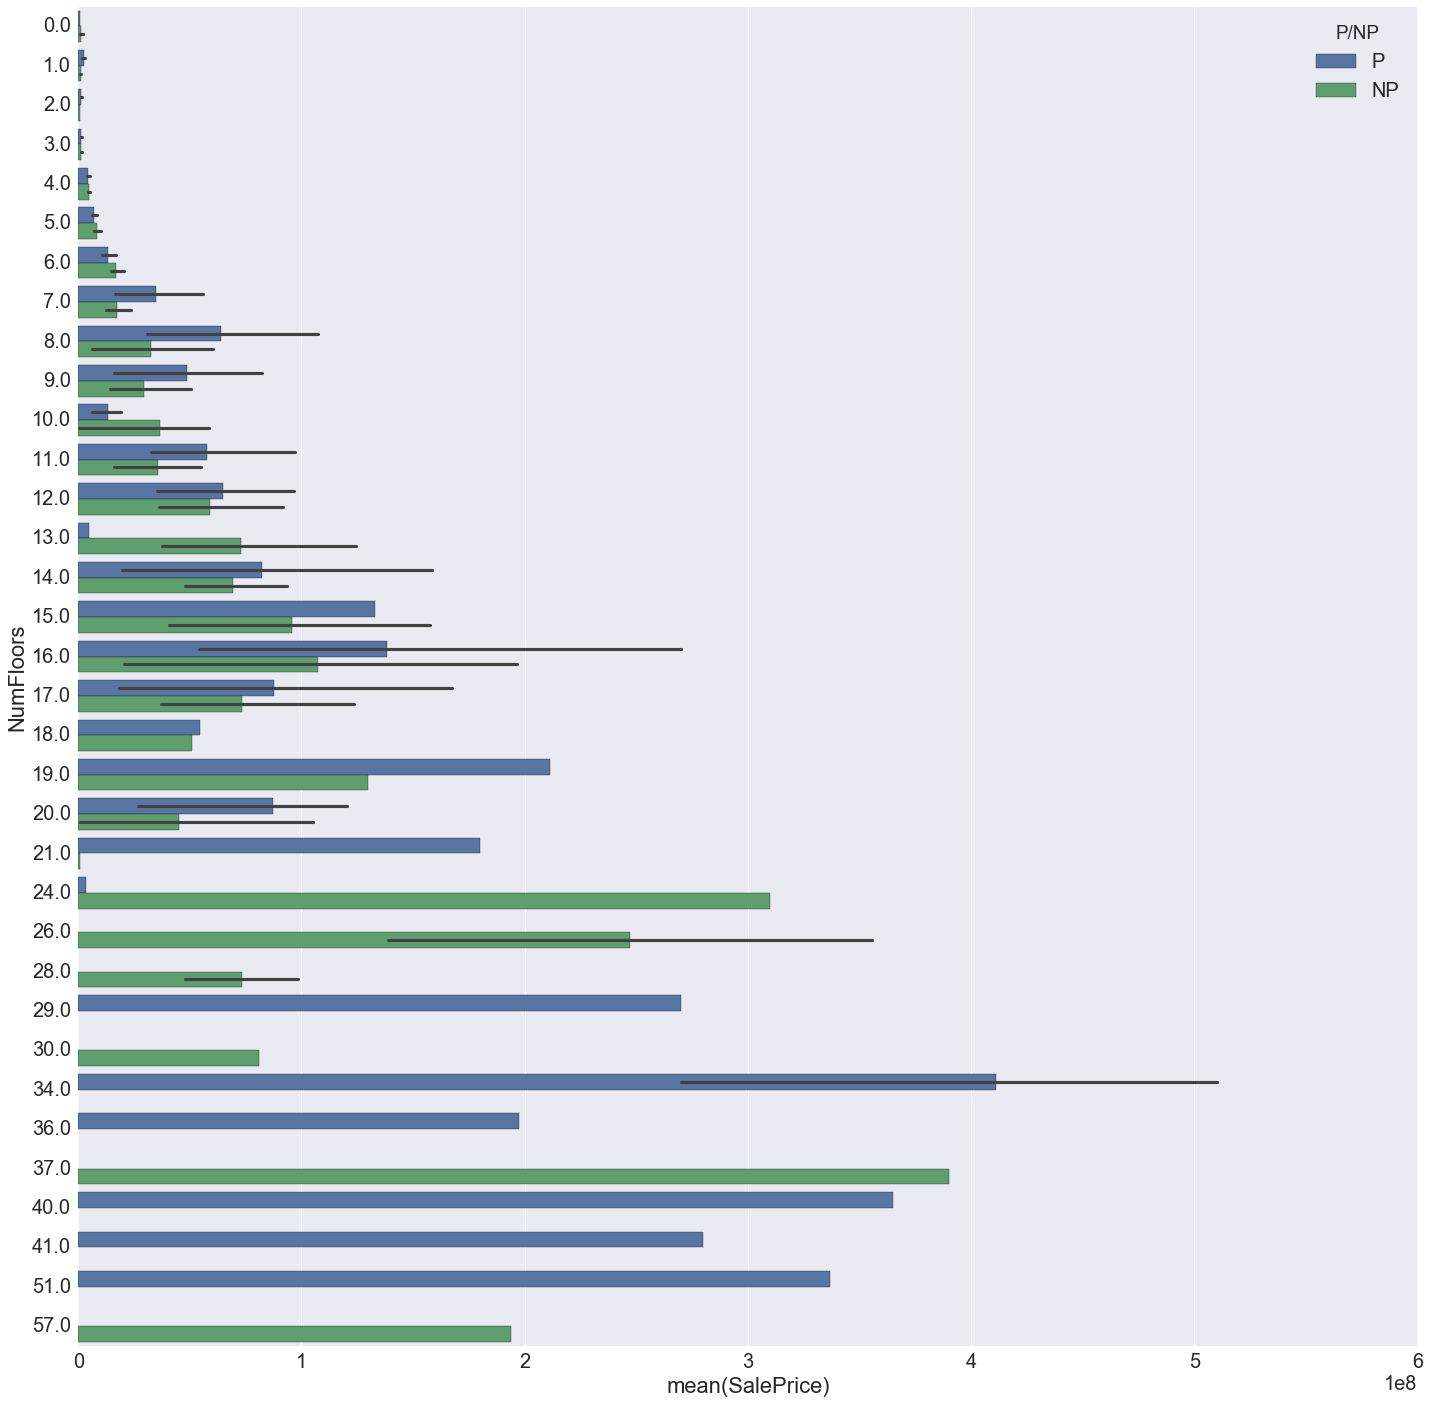

In [52]:
r_owner_dummy = owner_dummy.copy()
r_owner_dummy['NumFloors'] = owner_dummy['NumFloors'].apply(lambda x: round(x))
sns.set(font_scale=2)
f, ax = plt.subplots(figsize=(24, 24))
sns.barplot(y="NumFloors", x="SalePrice", hue="P/NP", data=r_owner_dummy, orient='h')

Seaborn also has a really nice `pointplot`, which is a bar plot in disguise, and I think neater looking (but also less familair):

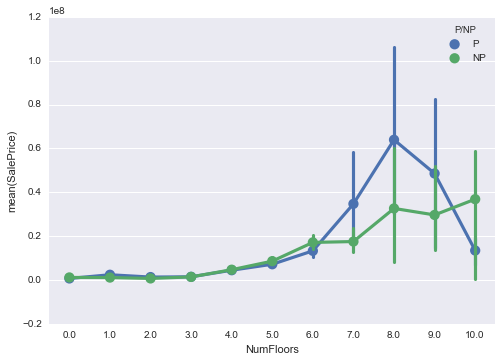

In [58]:
sns.pointplot(x="NumFloors", y="SalePrice", hue="P/NP", data=r_owner_dummy[owner_dummy['NumFloors'] <= 10])

...and what `seaborn` calls "countplot" (like `groupby().sum()` tables, or pivot tables) are also possible.

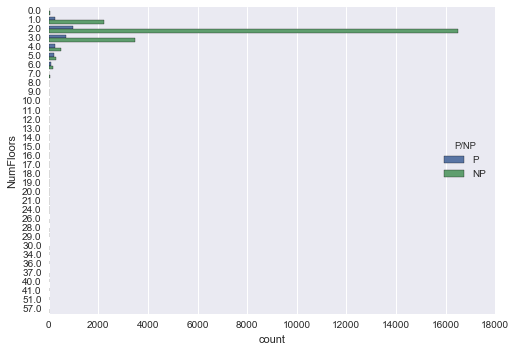

In [54]:
sns.set(font_scale=1)
sns.countplot(y="NumFloors", hue="P/NP", data=r_owner_dummy, orient='h')